In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150

print("✅ Libraries imported")

✅ Libraries imported


In [ ]:
# Load results from Notebooks 3 and 4
nominal_results = pd.read_csv('results/tables/nominal_results.csv')
ordinal_results = pd.read_csv('results/tables/ordinal_results.csv')

# Combine
all_results = pd.concat([nominal_results, ordinal_results], ignore_index=True)

print("✅ Loaded all results")
print("\n📊 Complete Results:")
all_results

✅ Loaded all results

📊 Complete Results:


,model,encoding,accuracy,mae,f1_macro,f1_weighted,precision_macro,recall_macro,training_time,precision_class_1,...,recall_class_3,f1_class_3,precision_class_4,recall_class_4,f1_class_4,precision_class_5,recall_class_5,f1_class_5,adjacent_error,severe_error
0,Naive Bayes,Nominal,0.637374,0.637274,0.258764,0.528046,0.429675,0.267619,0.011017,0.585185,...,0.010088,0.019584,0.400000,0.061386,0.106438,0.648038,0.983331,0.781228,0.571350,0.428650
1,Logistic Regression,Nominal,0.655290,0.534081,0.366045,0.598661,0.463822,0.347025,3.996227,0.584352,...,0.123581,0.178832,0.406877,0.210891,0.277796,0.705940,0.932837,0.803681,0.663182,0.336818
2,Ridge Regression,Ordinal,0.512461,0.593534,0.319769,0.533467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.818312,0.181688
3,Ordinal Logistic Regression,Ordinal,0.655090,0.535882,0.362270,0.598655,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.664248,0.335752


In [ ]:
# ============================================================================
# FORMATTED RESULTS TABLE (For Report)
# ============================================================================

print("=" * 80)
print("📋 RESULTS TABLE FOR REPORT")
print("=" * 80)

# Format for display
display_df = all_results.copy()
display_df['accuracy'] = display_df['accuracy'].apply(lambda x: f"{x:.2%}")
display_df['mae'] = display_df['mae'].apply(lambda x: f"{x:.4f}")
display_df['f1_macro'] = display_df['f1_macro'].apply(lambda x: f"{x:.4f}")
display_df['adjacent_error'] = display_df['adjacent_error'].apply(lambda x: f"{x:.1%}")
display_df['severe_error'] = display_df['severe_error'].apply(lambda x: f"{x:.1%}")

# Select columns for report
report_table = display_df[['model', 'encoding', 'accuracy', 'mae', 'f1_macro', 'adjacent_error', 'severe_error']]
report_table.columns = ['Model', 'Encoding', 'Accuracy', 'MAE', 'F1 Macro', 'Adj. Error', 'Severe Error']

print(report_table.to_string(index=False))

# Save for report
report_table.to_csv('results/tables/final_results_table.csv', index=False)
print("\n✅ Saved: results/tables/final_results_table.csv")

📋 RESULTS TABLE FOR REPORT
                      Model Encoding Accuracy    MAE F1 Macro Adj. Error Severe Error
                Naive Bayes  Nominal   63.74% 0.6373   0.2588      57.1%        42.9%
        Logistic Regression  Nominal   65.53% 0.5341   0.3660      66.3%        33.7%
           Ridge Regression  Ordinal   51.25% 0.5935   0.3198      81.8%        18.2%
Ordinal Logistic Regression  Ordinal   65.51% 0.5359   0.3623      66.4%        33.6%

✅ Saved: final_results_table.csv


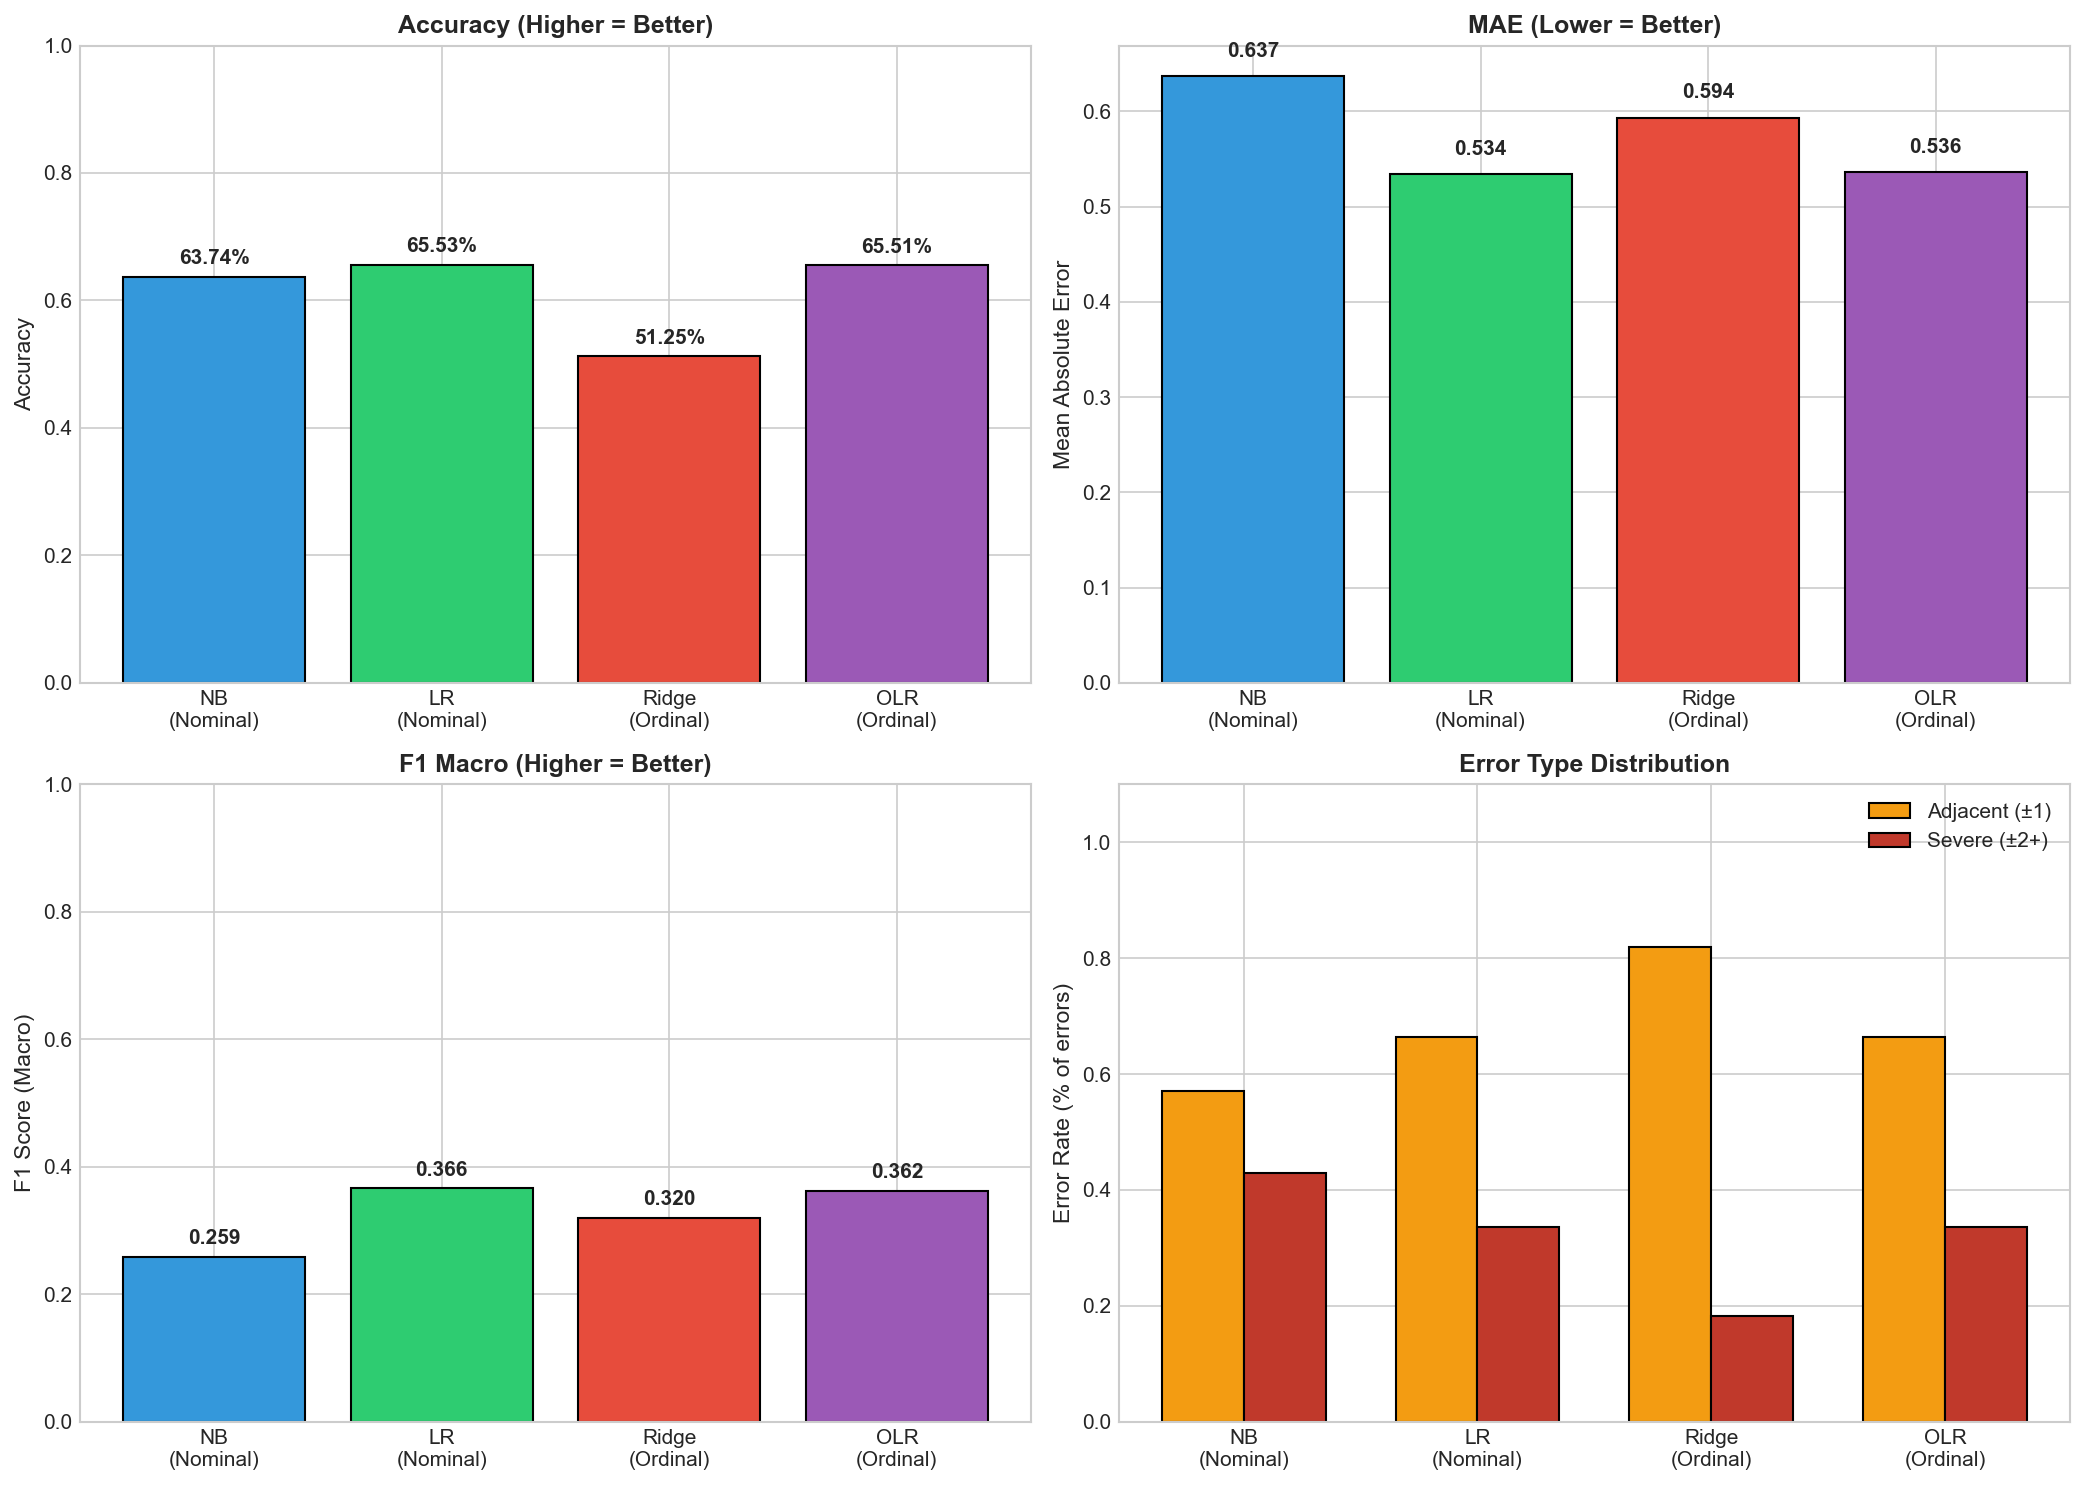


✅ Saved: model_comparison.png


In [ ]:
# ============================================================================
# MODEL COMPARISON VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

models = ['NB\n(Nominal)', 'LR\n(Nominal)', 'Ridge\n(Ordinal)', 'OLR\n(Ordinal)']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']

# Panel 1: Accuracy
bars = axes[0, 0].bar(range(len(models)), all_results['accuracy'], color=colors, edgecolor='black')
axes[0, 0].set_xticks(range(len(models)))
axes[0, 0].set_xticklabels(models, fontsize=10)
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Accuracy (Higher = Better)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylim([0, 1])
for i, v in enumerate(all_results['accuracy']):
    axes[0, 0].text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=10, fontweight='bold')

# Panel 2: MAE
bars = axes[0, 1].bar(range(len(models)), all_results['mae'], color=colors, edgecolor='black')
axes[0, 1].set_xticks(range(len(models)))
axes[0, 1].set_xticklabels(models, fontsize=10)
axes[0, 1].set_ylabel('Mean Absolute Error', fontsize=11)
axes[0, 1].set_title('MAE (Lower = Better)', fontsize=12, fontweight='bold')
for i, v in enumerate(all_results['mae']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')

# Panel 3: F1 Macro
bars = axes[1, 0].bar(range(len(models)), all_results['f1_macro'], color=colors, edgecolor='black')
axes[1, 0].set_xticks(range(len(models)))
axes[1, 0].set_xticklabels(models, fontsize=10)
axes[1, 0].set_ylabel('F1 Score (Macro)', fontsize=11)
axes[1, 0].set_title('F1 Macro (Higher = Better)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylim([0, 1])
for i, v in enumerate(all_results['f1_macro']):
    axes[1, 0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')

# Panel 4: Error Types
x = np.arange(len(models))
width = 0.35
bars1 = axes[1, 1].bar(x - width/2, all_results['adjacent_error'], width, 
                       label='Adjacent (±1)', color='#f39c12', edgecolor='black')
bars2 = axes[1, 1].bar(x + width/2, all_results['severe_error'], width, 
                       label='Severe (±2+)', color='#c0392b', edgecolor='black')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models, fontsize=10)
axes[1, 1].set_ylabel('Error Rate (% of errors)', fontsize=11)
axes[1, 1].set_title('Error Type Distribution', fontsize=12, fontweight='bold')
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('results/figures/model_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Saved: results/figures/model_comparison.png")

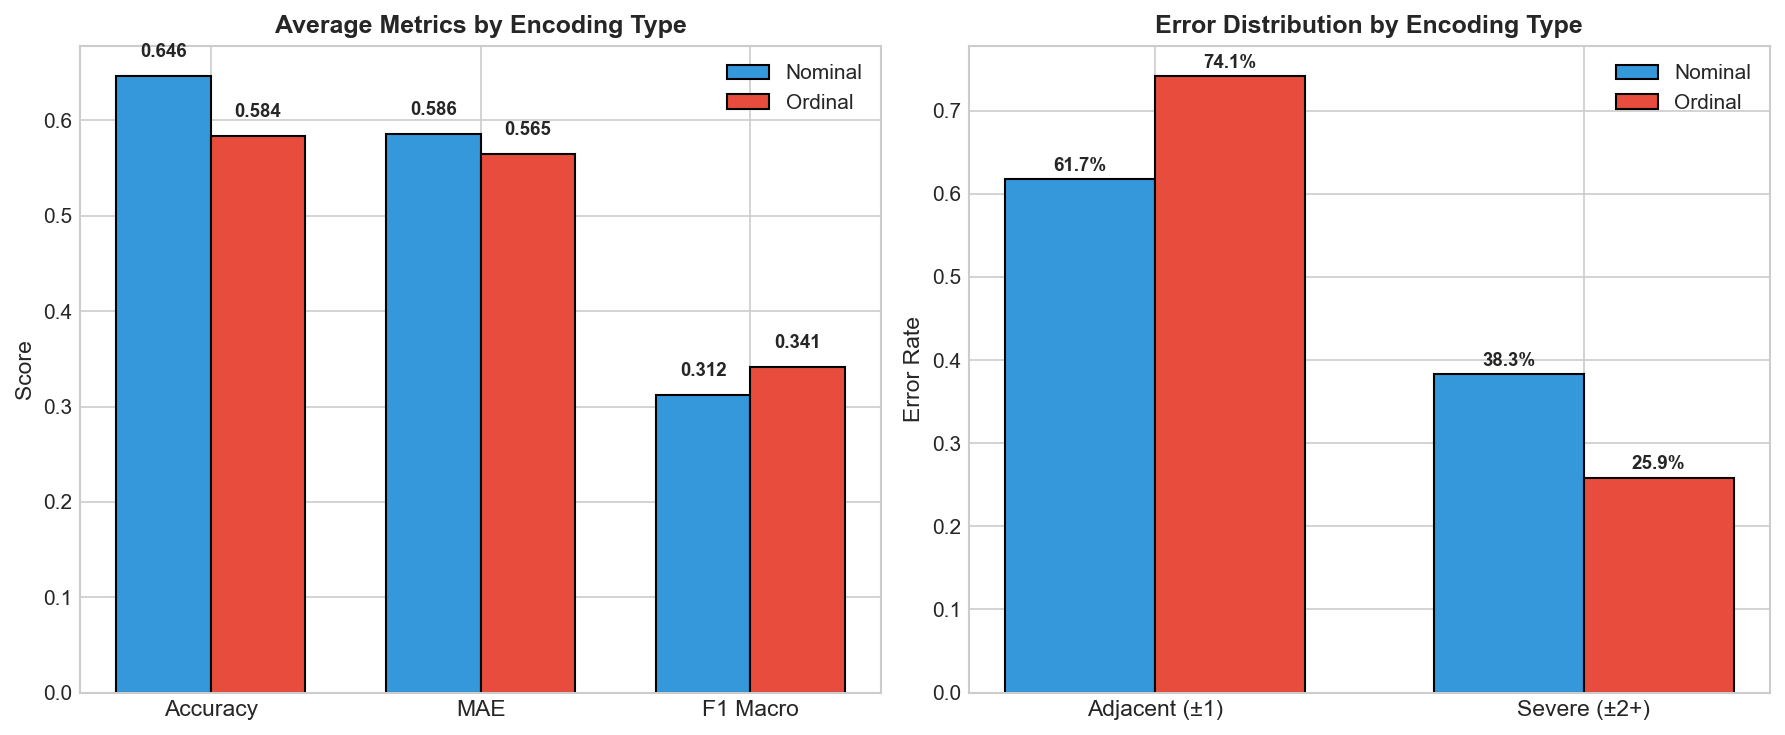


✅ Saved: ordinal_vs_nominal.png


In [ ]:
# ============================================================================
# ORDINAL VS NOMINAL COMPARISON
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Calculate averages by encoding type
nominal_data = all_results[all_results['encoding'] == 'Nominal']
ordinal_data = all_results[all_results['encoding'] == 'Ordinal']

# Panel 1: Metrics comparison
metrics = ['Accuracy', 'MAE', 'F1 Macro']
nominal_vals = [nominal_data['accuracy'].mean(), nominal_data['mae'].mean(), nominal_data['f1_macro'].mean()]
ordinal_vals = [ordinal_data['accuracy'].mean(), ordinal_data['mae'].mean(), ordinal_data['f1_macro'].mean()]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0].bar(x - width/2, nominal_vals, width, label='Nominal', color='#3498db', edgecolor='black')
bars2 = axes[0].bar(x + width/2, ordinal_vals, width, label='Ordinal', color='#e74c3c', edgecolor='black')

axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, fontsize=11)
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_title('Average Metrics by Encoding Type', fontsize=12, fontweight='bold')
axes[0].legend()

for i, (n, o) in enumerate(zip(nominal_vals, ordinal_vals)):
    axes[0].text(i - width/2, n + 0.02, f'{n:.3f}', ha='center', fontsize=9, fontweight='bold')
    axes[0].text(i + width/2, o + 0.02, f'{o:.3f}', ha='center', fontsize=9, fontweight='bold')

# Panel 2: Error type comparison
error_types = ['Adjacent (±1)', 'Severe (±2+)']
nominal_errors = [nominal_data['adjacent_error'].mean(), nominal_data['severe_error'].mean()]
ordinal_errors = [ordinal_data['adjacent_error'].mean(), ordinal_data['severe_error'].mean()]

x = np.arange(len(error_types))

bars1 = axes[1].bar(x - width/2, nominal_errors, width, label='Nominal', color='#3498db', edgecolor='black')
bars2 = axes[1].bar(x + width/2, ordinal_errors, width, label='Ordinal', color='#e74c3c', edgecolor='black')

axes[1].set_xticks(x)
axes[1].set_xticklabels(error_types, fontsize=11)
axes[1].set_ylabel('Error Rate', fontsize=11)
axes[1].set_title('Error Distribution by Encoding Type', fontsize=12, fontweight='bold')
axes[1].legend()

for i, (n, o) in enumerate(zip(nominal_errors, ordinal_errors)):
    axes[1].text(i - width/2, n + 0.01, f'{n:.1%}', ha='center', fontsize=9, fontweight='bold')
    axes[1].text(i + width/2, o + 0.01, f'{o:.1%}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('results/figures/ordinal_vs_nominal.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Saved: results/figures/ordinal_vs_nominal.png")

In [10]:
# ============================================================================
# KEY FINDINGS
# ============================================================================

print("=" * 70)
print("📝 KEY FINDINGS")
print("=" * 70)

# Best models
best_accuracy = all_results.loc[all_results['accuracy'].idxmax()]
best_mae = all_results.loc[all_results['mae'].idxmin()]
lowest_severe = all_results.loc[all_results['severe_error'].idxmin()]

print(f"\n1. BEST ACCURACY:")
print(f"   {best_accuracy['model']} ({best_accuracy['encoding']})")
print(f"   Accuracy: {best_accuracy['accuracy']:.2%}")

print(f"\n2. LOWEST MAE (Best Ordinal Performance):")
print(f"   {best_mae['model']} ({best_mae['encoding']})")
print(f"   MAE: {best_mae['mae']:.4f}")

print(f"\n3. LOWEST SEVERE ERROR RATE:")
print(f"   {lowest_severe['model']} ({lowest_severe['encoding']})")
print(f"   Severe Error Rate: {lowest_severe['severe_error']:.2%}")

# Ordinal vs Nominal comparison
nominal_avg_mae = nominal_data['mae'].mean()
ordinal_avg_mae = ordinal_data['mae'].mean()
mae_improvement = (nominal_avg_mae - ordinal_avg_mae) / nominal_avg_mae * 100

nominal_avg_severe = nominal_data['severe_error'].mean()
ordinal_avg_severe = ordinal_data['severe_error'].mean()
severe_reduction = (nominal_avg_severe - ordinal_avg_severe) / nominal_avg_severe * 100

print(f"\n4. ORDINAL VS NOMINAL COMPARISON:")
print(f"   ┌────────────────────────────────────────┐")
print(f"   │ Metric          │ Nominal │ Ordinal   │")
print(f"   ├────────────────────────────────────────┤")
print(f"   │ Avg MAE         │ {nominal_avg_mae:.4f}  │ {ordinal_avg_mae:.4f}    │")
print(f"   │ Avg Severe Err  │ {nominal_avg_severe:.2%}  │ {ordinal_avg_severe:.2%}    │")
print(f"   └────────────────────────────────────────┘")
print(f"\n   ✅ MAE Improvement: {mae_improvement:.2f}%")
print(f"   ✅ Severe Error Reduction: {severe_reduction:.2f}%")

📝 KEY FINDINGS

1. BEST ACCURACY:
   Logistic Regression (Nominal)
   Accuracy: 65.53%

2. LOWEST MAE (Best Ordinal Performance):
   Logistic Regression (Nominal)
   MAE: 0.5341

3. LOWEST SEVERE ERROR RATE:
   Ridge Regression (Ordinal)
   Severe Error Rate: 18.17%

4. ORDINAL VS NOMINAL COMPARISON:
   ┌────────────────────────────────────────┐
   │ Metric          │ Nominal │ Ordinal   │
   ├────────────────────────────────────────┤
   │ Avg MAE         │ 0.5857  │ 0.5647    │
   │ Avg Severe Err  │ 38.27%  │ 25.87%    │
   └────────────────────────────────────────┘

   ✅ MAE Improvement: 3.58%
   ✅ Severe Error Reduction: 32.40%


In [ ]:
# ============================================================================
# SUMMARY FOR REPORT 
# ============================================================================

print("\n" + "="*70)
print("📄 SUMMARY FOR REPORT")
print("="*70)

summary = f"""
RESEARCH QUESTION:
Do the performance gains from ordinal treatment of 5-star ratings 
justify the increased model complexity?

DATASET:
- Amazon Electronics Reviews (McAuley Lab, UCSD)
- Features: TF-IDF (5,000 features, unigrams + bigrams)

MODELS COMPARED:
┌─────────────────────────┬──────────┐
│ Model                   │ Encoding │
├─────────────────────────┼──────────┤
│ Multinomial Naive Bayes │ Nominal  │
│ Logistic Regression     │ Nominal  │
│ Ridge Regression        │ Ordinal  │
│ Ordinal Logistic Reg    │ Ordinal  │
└─────────────────────────┴──────────┘

KEY RESULTS:
- Best Accuracy: {best_accuracy['model']} ({best_accuracy['accuracy']:.2%})
- Lowest MAE: {best_mae['model']} ({best_mae['mae']:.4f})
- Lowest Severe Error: {lowest_severe['model']} ({lowest_severe['severe_error']:.2%})

ORDINAL VS NOMINAL:
- MAE Improvement: {mae_improvement:.2f}%
- Severe Error Reduction: {severe_reduction:.2f}%

CONCLUSION:
Ordinal methods reduce MAE by {mae_improvement:.1f}% and severe errors 
by {severe_reduction:.1f}%, supporting the hypothesis that ordinal 
treatment improves sentiment classification quality.

The performance gains justify the model complexity when:
1. Minimizing severe misclassifications is important
2. The ordinal structure of ratings is meaningful
3. User experience depends on prediction accuracy
"""

print(summary)


📄 SUMMARY FOR REPORT

RESEARCH QUESTION:
Do the performance gains from ordinal treatment of 5-star ratings 
justify the increased model complexity?

DATASET:
- Amazon Electronics Reviews (McAuley Lab, UCSD)
- Features: TF-IDF (5,000 features, unigrams + bigrams)

MODELS COMPARED:
┌─────────────────────────┬──────────┐
│ Model                   │ Encoding │
├─────────────────────────┼──────────┤
│ Multinomial Naive Bayes │ Nominal  │
│ Logistic Regression     │ Nominal  │
│ Ridge Regression        │ Ordinal  │
│ Ordinal Logistic Reg    │ Ordinal  │
└─────────────────────────┴──────────┘

KEY RESULTS:
- Best Accuracy: Logistic Regression (65.53%)
- Lowest MAE: Logistic Regression (0.5341)
- Lowest Severe Error: Ridge Regression (18.17%)

ORDINAL VS NOMINAL:
- MAE Improvement: 3.58%
- Severe Error Reduction: 32.40%

CONCLUSION:
Ordinal methods reduce MAE by 3.6% and severe errors 
by 32.4%, supporting the hypothesis that ordinal 
treatment improves sentiment classification quality.

The 